# ***EDA***

## ***STEP 1***

In [1]:
!unzip /content/statlog+german+credit+data.zip

Archive:  /content/statlog+german+credit+data.zip
  inflating: german.data             
  inflating: german.data-numeric     
  inflating: german.doc              
  inflating: Index                   


In [2]:
import pandas as pd, numpy as np, zipfile, os, io

zip_path = "/content/statlog+german+credit+data.zip"
with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall("/content/german_credit")
os.listdir("/content/german_credit")

['german.data-numeric', 'german.data', 'german.doc', 'Index']

In [3]:
col_names = [
    "checking_status","duration","credit_history","purpose","credit_amount",
    "savings","employment","installment_rate","personal_status_sex","guarantors",
    "residence_since","property","age","other_installment_plans","housing",
    "existing_credits","job","dependents","telephone","foreign_worker","target"
]

In [4]:
dfs = {}
for f in os.listdir("/content/german_credit"):
    if f.endswith(".data") or f.endswith(".test") or f.endswith(".data-numeric"):
        path = f"/content/german_credit/{f}"
        try:
            df_tmp = pd.read_csv(path, delim_whitespace=True, names=col_names)
            dfs[f] = df_tmp
            print(f"Loaded {f}: {df_tmp.shape}")
        except Exception as e:
            print(f"❌ Could not load {f}: {e}")

Loaded german.data-numeric: (1000, 21)
Loaded german.data: (1000, 21)


/tmp/ipython-input-2835859250.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(path, delim_whitespace=True, names=col_names)
/tmp/ipython-input-2835859250.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(path, delim_whitespace=True, names=col_names)


In [7]:
df = dfs.get("german.data")
if df is None or df.empty:
    df = list(dfs.values())[0]

In [9]:
print("\nBasic Info")
print(f"Rows: {len(df)}, Columns: {df.shape[1]}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Missing values total: {df.isna().sum().sum()}")


Basic Info
Rows: 1000, Columns: 21
Duplicate rows: 0
Missing values total: 0


In [10]:
integrity = pd.DataFrame({
    "dtype": df.dtypes,
    "unique_vals": df.nunique(),
    "missing": df.isna().sum(),
    "sample_values": [df[c].unique()[:5] for c in df.columns]
})
display(integrity)

,dtype,unique_vals,missing,sample_values
checking_status,object,4,0,"[A11, A12, A14, A13]"
duration,int64,33,0,"[6, 48, 12, 42, 24]"
credit_history,object,5,0,"[A34, A32, A33, A30, A31]"
purpose,object,10,0,"[A43, A46, A42, A40, A41]"
credit_amount,int64,921,0,"[1169, 5951, 2096, 7882, 4870]"
savings,object,5,0,"[A65, A61, A63, A64, A62]"
employment,object,5,0,"[A75, A73, A74, A71, A72]"
installment_rate,int64,4,0,"[4, 2, 3, 1]"
personal_status_sex,object,4,0,"[A93, A92, A91, A94]"
guarantors,object,3,0,"[A101, A103, A102]"


In [11]:
num_cols = ["duration","credit_amount","installment_rate","residence_since",
            "age","existing_credits","dependents"]

desc = df[num_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [12]:
for c in num_cols:
    bad = df[df[c] <= 0]
    if len(bad):
        print(f"⚠️ {c} has {len(bad)} nonpositive values")
z_scores = ((df[num_cols] - df[num_cols].mean()) / df[num_cols].std()).abs()
print("\nOutlier counts (|z|>3):")
print((z_scores > 3).sum())


Outlier counts (|z|>3):
duration            14
credit_amount       25
installment_rate     0
residence_since      0
age                  7
existing_credits     6
dependents           0
dtype: int64


In [13]:
df["target"] = df["target"].map({1: "Good", 2: "Bad"})
class_counts = df["target"].value_counts()
class_pct = class_counts / len(df)
print("\n🎯 Class Distribution")
print(pd.concat([class_counts, class_pct.rename("pct")], axis=1))

majority = class_counts.idxmax()
baseline_acc = class_counts.max() / len(df)
cost_matrix = {"Good": {"Good": 0, "Bad": 1},
               "Bad":  {"Good": 5, "Bad": 0}}
expected_cost = (
    (class_counts["Good"] / len(df)) * cost_matrix["Good"]["Bad"]
  + (class_counts["Bad"] / len(df))  * cost_matrix["Bad"]["Good"]
)
print(f"\nBaseline accuracy (majority class = {majority}): {baseline_acc:.3f}")
print(f"Expected baseline misclassification cost: {expected_cost:.3f}")


🎯 Class Distribution
        count  pct
target            
Good      700  0.7
Bad       300  0.3

Baseline accuracy (majority class = Good): 0.700
Expected baseline misclassification cost: 2.200


In [14]:
suspect_cols = ["credit_history","property","job"]
print("\n🔍 Potential leakage candidates:", suspect_cols)


🔍 Potential leakage candidates: ['credit_history', 'property', 'job']


In [16]:
os.makedirs("/content/eda_outputs", exist_ok=True)
df.to_csv("/content/eda_outputs/german_clean_main.csv", index=False)
if "german.data-numeric" in dfs:
    dfs["german.data-numeric"].to_csv("/content/eda_outputs/german_numeric.csv", index=False)

print("\nStep 1 complete — all files checked and main dataset validated.")


Step 1 complete — all files checked and main dataset validated.


## ***STEP 2***

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("/content/eda_outputs/german_clean_main.csv")

In [19]:
def calc_woe_iv(df, feature, target='target'):
    """Compute Weight of Evidence (WOE) and Information Value (IV) for a categorical feature."""
    temp = df.groupby(feature)[target].value_counts(normalize=False).unstack().fillna(0)
    temp.columns = ['Good', 'Bad']
    temp['Dist_Good'] = temp['Good'] / temp['Good'].sum()
    temp['Dist_Bad'] = temp['Bad'] / temp['Bad'].sum()
    temp['WOE'] = np.log((temp['Dist_Good'] + 1e-9) / (temp['Dist_Bad'] + 1e-9))
    temp['IV'] = (temp['Dist_Good'] - temp['Dist_Bad']) * temp['WOE']
    temp['BadRate'] = temp['Bad'] / (temp['Good'] + temp['Bad'])
    temp = temp.sort_values('BadRate', ascending=True)
    iv = temp['IV'].sum()
    return temp, iv

def categorize_features(df):
    return [col for col in df.columns if df[col].dtype == 'object' and col != 'target']


In [20]:
cat_cols = categorize_features(df)
print(f"Detected {len(cat_cols)} categorical features:\n", cat_cols)

Detected 13 categorical features:
 ['checking_status', 'credit_history', 'purpose', 'savings', 'employment', 'personal_status_sex', 'guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [21]:

iv_summary = []
woe_tables = {}

for col in cat_cols:
    t, iv_val = calc_woe_iv(df, col)
    woe_tables[col] = t
    iv_summary.append({'Feature': col, 'IV': iv_val})

iv_summary = pd.DataFrame(iv_summary).sort_values('IV', ascending=False)
print("\n📊 Information Value Summary (higher = more predictive):")
display(iv_summary)


📊 Information Value Summary (higher = more predictive):


,Feature,IV
0,checking_status,0.666012
1,credit_history,0.293234
3,savings,0.196010
2,purpose,0.169195
7,property,0.112638
4,employment,0.086434
9,housing,0.083293
8,other_installment_plans,0.057615
5,personal_status_sex,0.044671
12,foreign_worker,0.043877


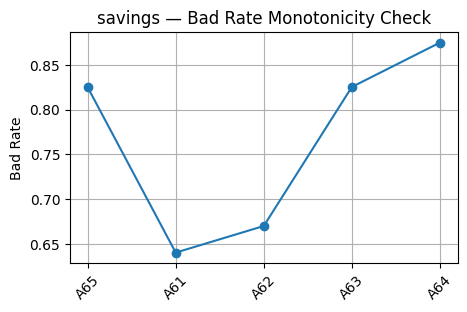

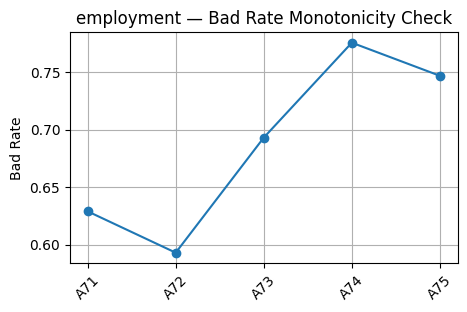

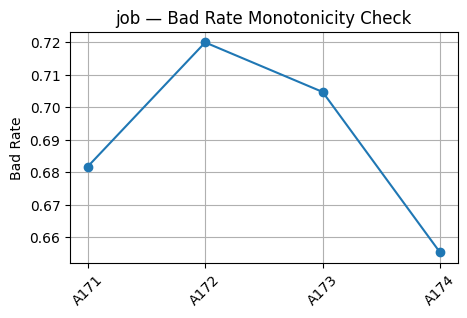

In [22]:

ordinal_sets = {
    'savings': ['A65','A61','A62','A63','A64'],             # no acct → <100 → 100–500 → 500–1000 → ≥1000
    'employment': ['A71','A72','A73','A74','A75'],          # unemployed → <1 → 1–4 → 4–7 → ≥7 yrs
    'job': ['A171','A172','A173','A174']                    # unskilled → unskilled resident → skilled → mgmt
}

for var, order in ordinal_sets.items():
    if var in woe_tables:
        temp = woe_tables[var].reindex(order)
        plt.figure(figsize=(5,3))
        plt.plot(temp.index, temp['BadRate'], marker='o')
        plt.title(f"{var} — Bad Rate Monotonicity Check")
        plt.xticks(rotation=45)
        plt.ylabel("Bad Rate")
        plt.grid(True)
        plt.show()

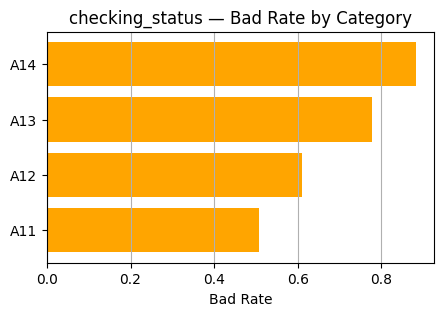

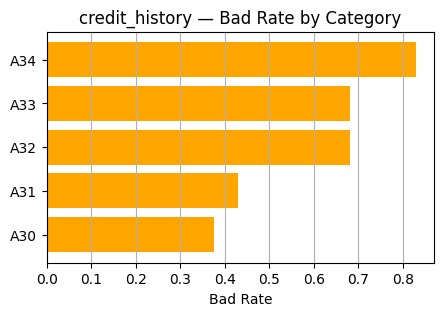

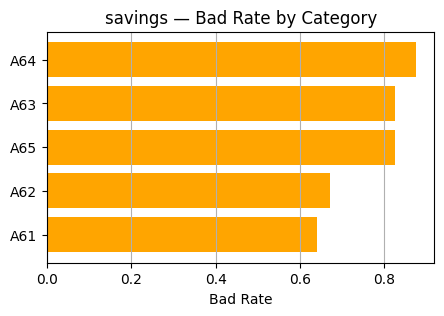

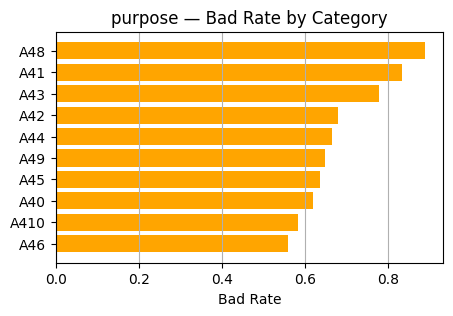

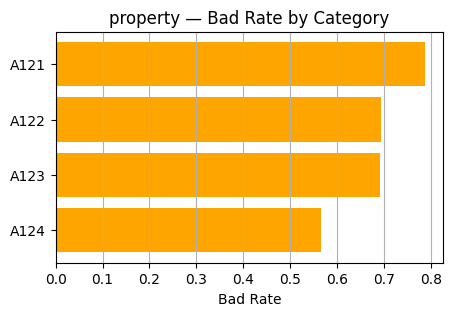

In [23]:
top_vars = iv_summary.head(5)['Feature'].tolist()
for col in top_vars:
    tab = woe_tables[col]
    plt.figure(figsize=(5,3))
    plt.barh(tab.index, tab['BadRate'], color='orange')
    plt.title(f"{col} — Bad Rate by Category")
    plt.xlabel("Bad Rate")
    plt.grid(axis='x')
    plt.show()

In [24]:
iv_summary.to_csv("/content/eda_outputs/iv_summary.csv", index=False)
for k,v in woe_tables.items():
    v.to_csv(f"/content/eda_outputs/woe_{k}.csv")

print("\nStep 2 complete — WOE/IV analysis & monotonicity plots generated.")


✅ Step 2 complete — WOE/IV analysis & monotonicity plots generated.


## ***STEP 3***

In [25]:
import seaborn as sns

In [26]:
df = pd.read_csv("/content/eda_outputs/german_clean_main.csv")

df["target"] = df["target"].map({"Good": 1, "Bad": 0})

In [27]:
num_cols = ["duration","credit_amount","installment_rate",
            "residence_since","age","existing_credits","dependents"]

print(f"Numeric columns: {num_cols}")

Numeric columns: ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits', 'dependents']


In [28]:
desc = df[num_cols].describe().T
desc["skew"] = df[num_cols].skew()
desc["kurtosis"] = df[num_cols].kurtosis()
display(desc)

# Detect highly skewed columns (|skew| > 1)
skewed = desc[abs(desc["skew"]) > 1].index.tolist()
print("⚠️ Highly skewed variables:", skewed)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,1.094184,0.919781
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0,1.949628,4.292590
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0,-0.531348,-1.210473
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0,-0.272570,-1.381449
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0,1.020739,0.595780
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0,1.272576,1.604439
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0,1.909445,1.649274


⚠️ Highly skewed variables: ['duration', 'credit_amount', 'age', 'existing_credits', 'dependents']


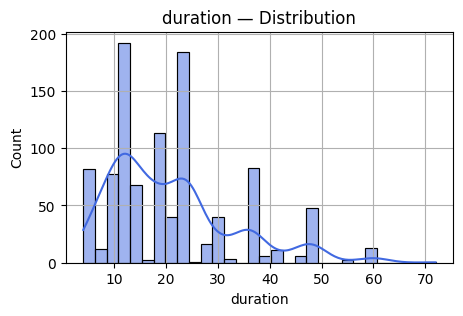

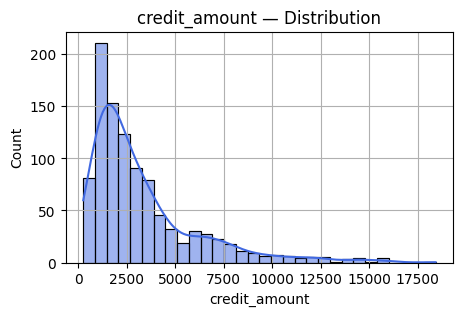

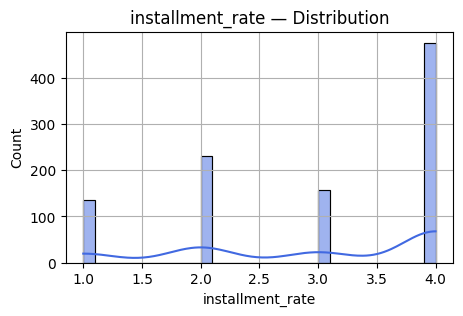

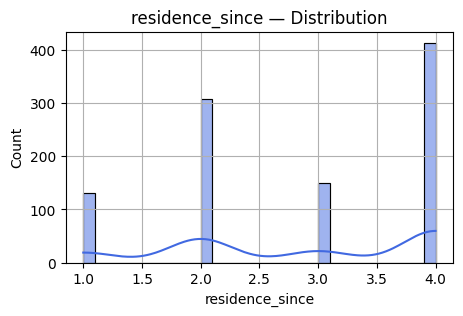

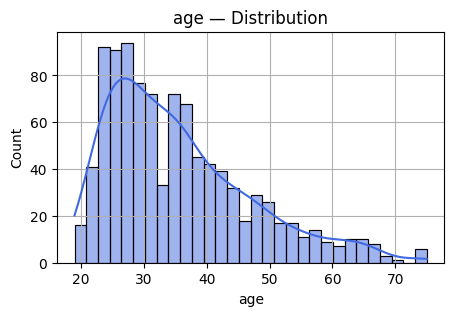

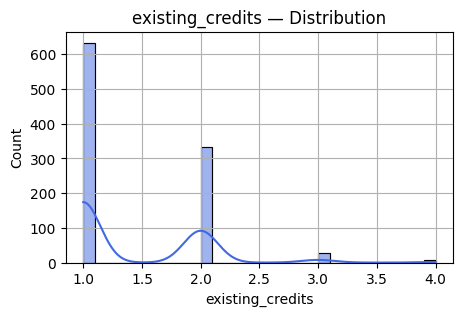

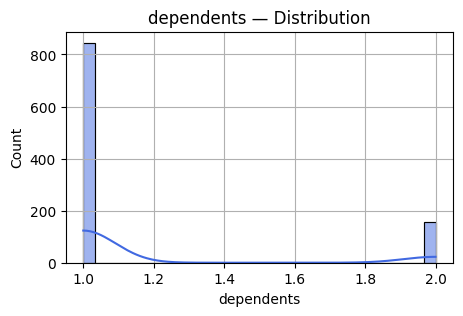

In [29]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30, color='royalblue')
    plt.title(f"{col} — Distribution")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


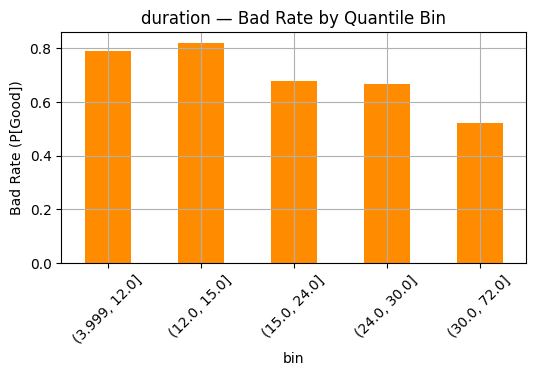

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


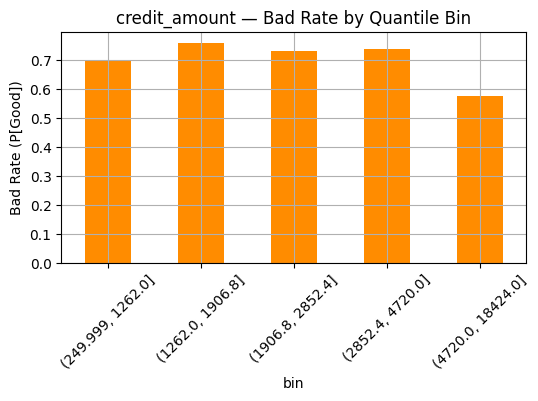

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


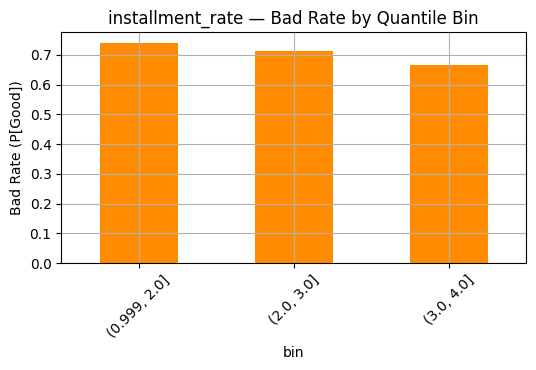

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


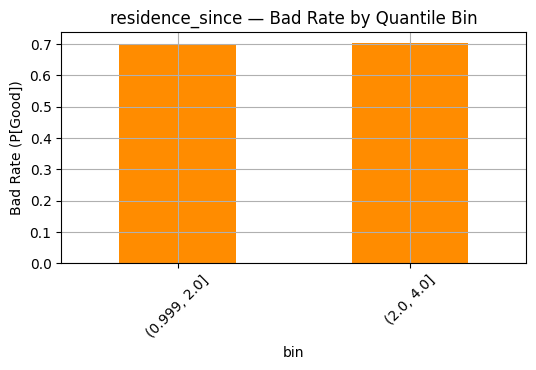

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


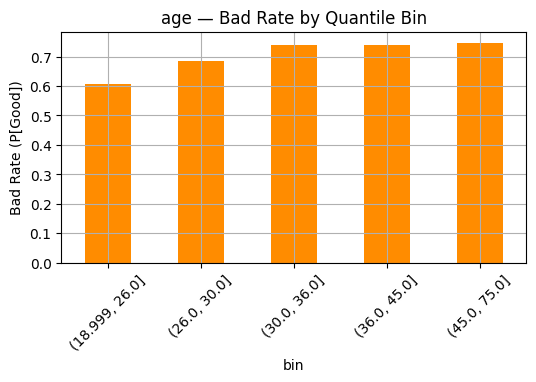

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


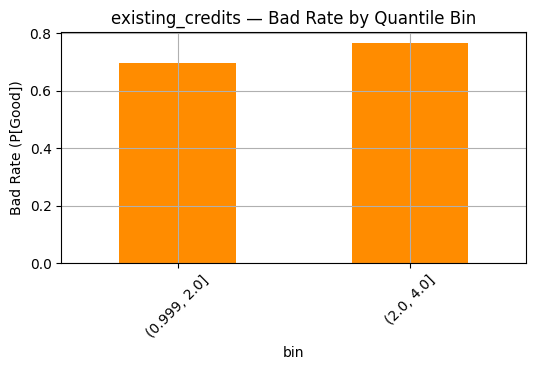

/tmp/ipython-input-1840217218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby('bin')['target'].mean()


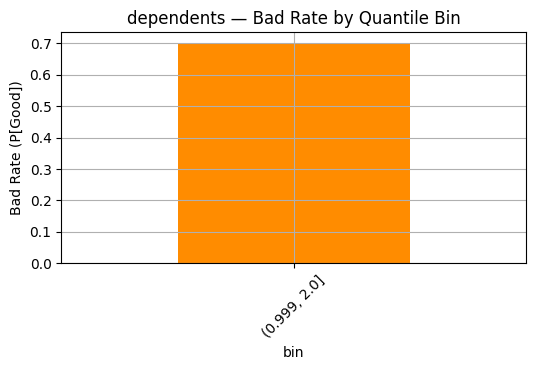

In [30]:
def bad_rate_by_bins(col, bins=5):
    temp = pd.DataFrame({
        col: df[col],
        'target': df['target']
    })
    temp['bin'] = pd.qcut(temp[col], q=bins, duplicates='drop')
    grouped = temp.groupby('bin')['target'].mean()
    grouped.plot(kind='bar', color='darkorange', figsize=(6,3))
    plt.title(f"{col} — Bad Rate by Quantile Bin")
    plt.ylabel("Bad Rate (P[Good])")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

for col in num_cols:
    bad_rate_by_bins(col)

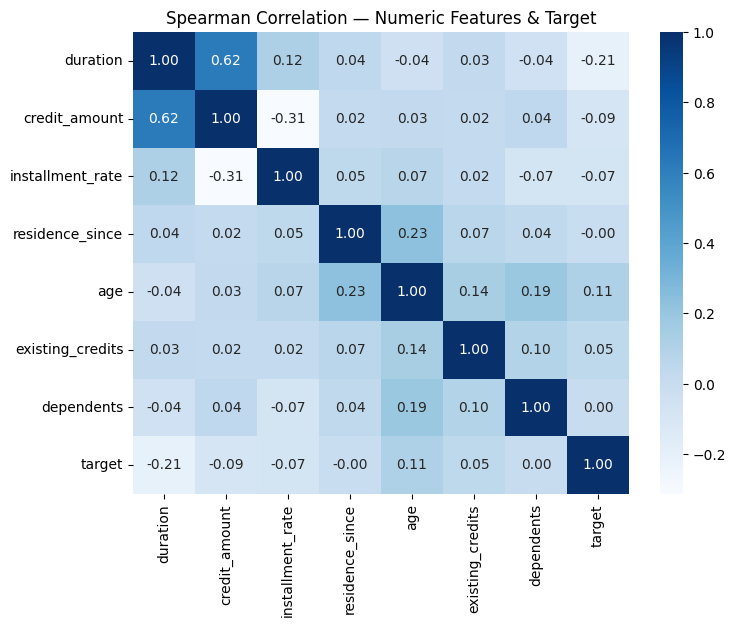


Top correlated feature pairs (|ρ| > 0.5):
credit_amount  duration         0.624709
duration       credit_amount    0.624709
dtype: float64


In [31]:
corr = df[num_cols + ["target"]].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Spearman Correlation — Numeric Features & Target")
plt.show()

# Key high-correlation pairs
high_corr = corr.abs().unstack().sort_values(ascending=False)
print("\nTop correlated feature pairs (|ρ| > 0.5):")
print(high_corr[(high_corr < 1.0) & (high_corr > 0.5)].head(10))

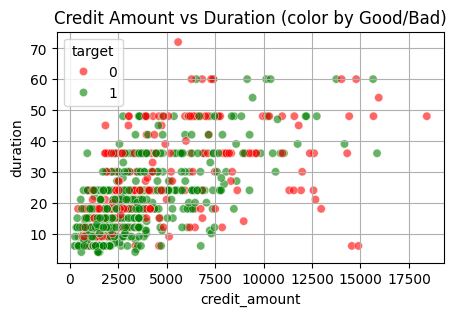

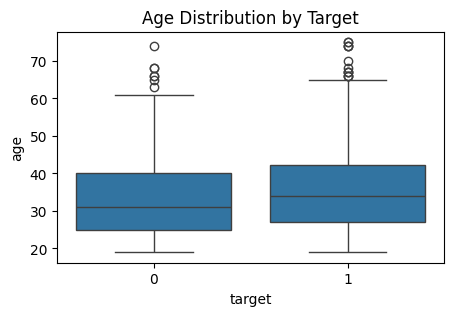

In [32]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='credit_amount', y='duration', hue='target', data=df,
                palette=['red','green'], alpha=0.6)
plt.title("Credit Amount vs Duration (color by Good/Bad)")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Target")
plt.show()

In [33]:
desc.to_csv("/content/eda_outputs/numeric_summary.csv")
corr.to_csv("/content/eda_outputs/numeric_corr_spearman.csv")

print("\nStep 3 complete — Numeric audit, correlations, and visual checks done.")


Step 3 complete — Numeric audit, correlations, and visual checks done.


## ***STEP 4***

In [35]:
df = pd.read_csv("/content/eda_outputs/german_clean_main.csv")
df["target"] = df["target"].map({"Good": 1, "Bad": 0})

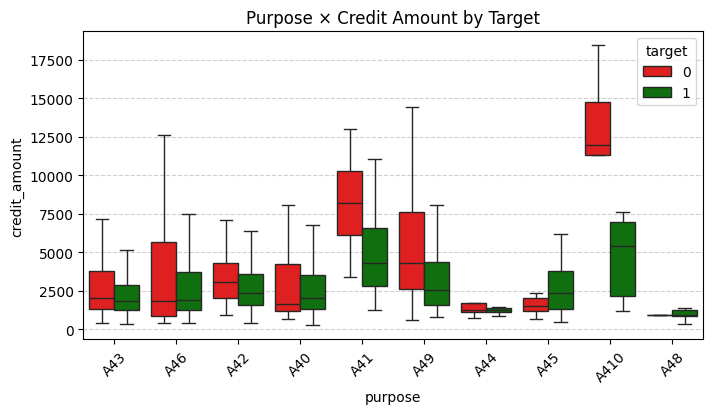

target,0,1
purpose,,
A40,3463.269663,2817.358621
A41,8193.882353,4812.058140
A410,11566.000000,5811.714286
A42,3645.500000,2794.195122
A43,2780.209677,2404.449541
A44,1571.000000,1461.500000
A45,2791.125000,2692.071429
A46,3254.136364,3122.464286
A48,902.000000,1243.875000


In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="purpose", y="credit_amount", hue="target",
            palette={1:"green",0:"red"}, showfliers=False)
plt.title("Purpose × Credit Amount by Target")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.show()

# Mean credit amount per purpose & target
purpose_stats = df.groupby(["purpose","target"])["credit_amount"].mean().unstack()
display(purpose_stats)

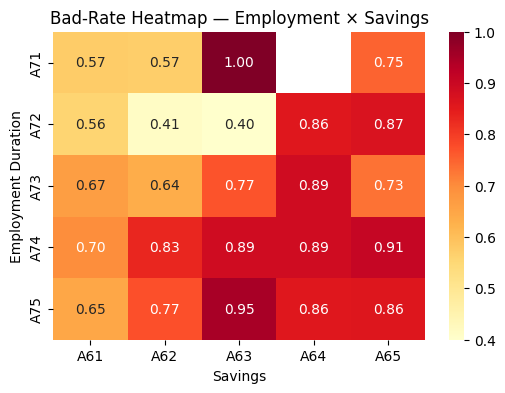

In [37]:
cross = pd.crosstab(df["employment"], df["savings"], values=df["target"], aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap(cross, cmap="YlOrRd", annot=True, fmt=".2f")
plt.title("Bad-Rate Heatmap — Employment × Savings")
plt.xlabel("Savings")
plt.ylabel("Employment Duration")
plt.show()

/tmp/ipython-input-490317547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_history = df.groupby(["age_bin","credit_history"])["target"].mean().unstack()


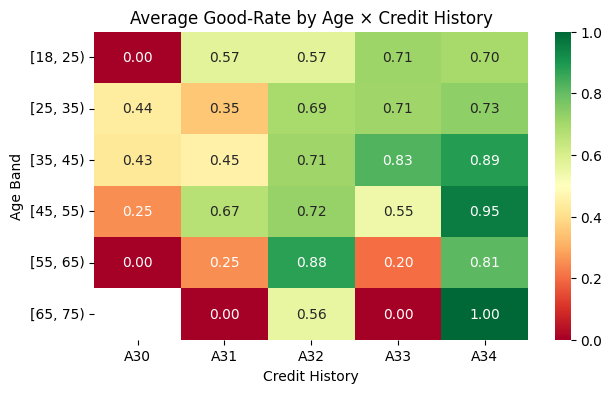

In [38]:
df["age_bin"] = pd.cut(df["age"], bins=[18,25,35,45,55,65,75], right=False)
age_history = df.groupby(["age_bin","credit_history"])["target"].mean().unstack()
plt.figure(figsize=(7,4))
sns.heatmap(age_history, cmap="RdYlGn", annot=True, fmt=".2f")
plt.title("Average Good-Rate by Age × Credit History")
plt.xlabel("Credit History")
plt.ylabel("Age Band")
plt.show()

In [39]:
def disparity_report(feature):
    temp = df.groupby(feature)["target"].agg(["mean","count"])
    temp.rename(columns={"mean":"GoodRate"}, inplace=True)
    temp["BadRate"] = 1 - temp["GoodRate"]
    temp["Δ_BadRate"] = temp["BadRate"] - temp["BadRate"].min()
    return temp.sort_values("BadRate", ascending=False)

sensitive_features = ["personal_status_sex","foreign_worker","telephone"]
fairness_reports = {}
for f in sensitive_features:
    fairness_reports[f] = disparity_report(f)
    print(f"\n  Fairness snapshot for {f}")
    display(fairness_reports[f])


⚖️  Fairness snapshot for personal_status_sex


,GoodRate,count,BadRate,Δ_BadRate
personal_status_sex,,,,
A91,0.600000,50,0.400000,0.133577
A92,0.648387,310,0.351613,0.085190
A94,0.728261,92,0.271739,0.005316
A93,0.733577,548,0.266423,0.000000



⚖️  Fairness snapshot for foreign_worker


,GoodRate,count,BadRate,Δ_BadRate
foreign_worker,,,,
A201,0.692627,963,0.307373,0.199265
A202,0.891892,37,0.108108,0.000000



⚖️  Fairness snapshot for telephone


,GoodRate,count,BadRate,Δ_BadRate
telephone,,,,
A191,0.686242,596,0.313758,0.034055
A192,0.720297,404,0.279703,0.000000


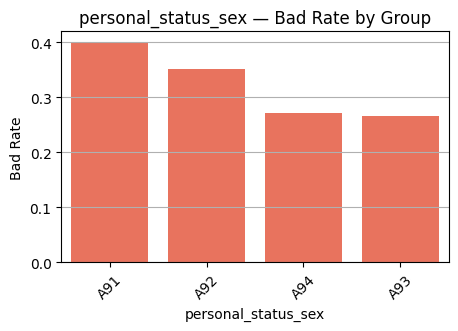

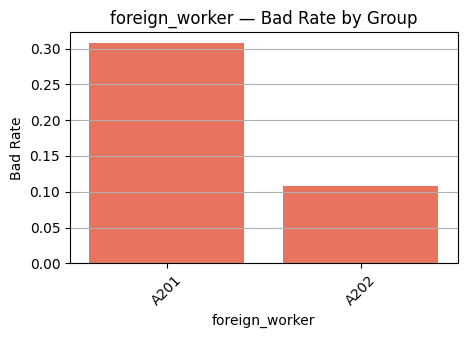

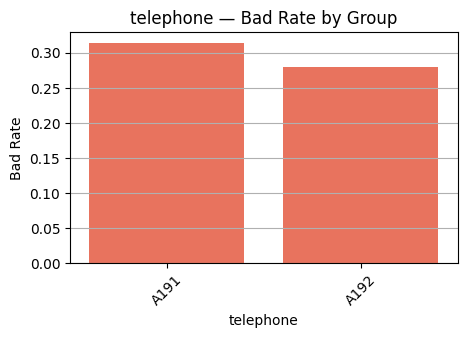

In [40]:
for f, tab in fairness_reports.items():
    plt.figure(figsize=(5,3))
    sns.barplot(x=tab.index, y=tab["BadRate"], color="tomato")
    plt.title(f"{f} — Bad Rate by Group")
    plt.xticks(rotation=45)
    plt.ylabel("Bad Rate")
    plt.grid(axis='y')
    plt.show()

In [41]:
for k,v in fairness_reports.items():
    v.to_csv(f"/content/eda_outputs/fairness_{k}.csv")
purpose_stats.to_csv("/content/eda_outputs/interaction_purpose_amount.csv")
cross.to_csv("/content/eda_outputs/interaction_employment_savings.csv")
age_history.to_csv("/content/eda_outputs/interaction_age_history.csv")

print("\n Step 4 complete — Interaction heatmaps and fairness disparity reports exported.")



 Step 4 complete — Interaction heatmaps and fairness disparity reports exported.


## ***STEP 5***

In [42]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

In [43]:
df = pd.read_csv("/content/eda_outputs/german_clean_main.csv")
df["target"] = df["target"].map({"Good": 1, "Bad": 0})   # Good=1 (positive), Bad=0 (negative)


In [44]:
np.random.seed(42)
df["score"] = (
    0.6*df["duration"].rank(pct=True)
  - 0.4*df["credit_amount"].rank(pct=True)
  + np.random.normal(0,0.1,len(df))
)
df["score"] = (df["score"] - df["score"].min()) / (df["score"].max()-df["score"].min())

In [45]:
# Cost definitions
COST_FN = 5   # Predict Good when actually Bad (false negative for Bad)
COST_FP = 1   # Predict Bad when actually Good
COST_TN = 0
COST_TP = 0

In [46]:
def expected_cost(threshold):
    preds = (df["score"] >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(df["target"], preds).ravel()
    cost = (fp*COST_FP + fn*COST_FN) / len(df)
    return {"threshold": threshold, "FP": fp, "FN": fn, "cost": cost}

thresholds = np.linspace(0.0,1.0,101)
cost_results = pd.DataFrame([expected_cost(t) for t in thresholds])
best_t = cost_results.loc[cost_results["cost"].idxmin(),"threshold"]


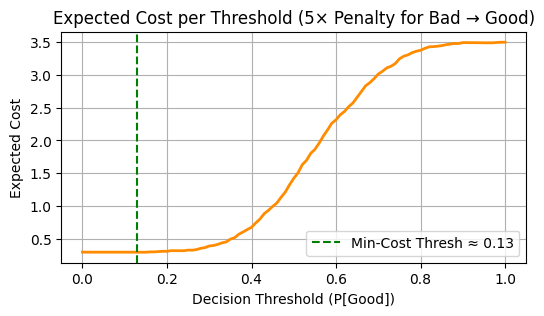

✅ Optimal threshold ≈ 0.130 (estimated minimum expected cost).


In [48]:
plt.figure(figsize=(6,3))
plt.plot(cost_results["threshold"], cost_results["cost"], color="darkorange", lw=2)
plt.axvline(best_t, color="green", linestyle="--", label=f"Min-Cost Thresh ≈ {best_t:.2f}")
plt.title("Expected Cost per Threshold (5× Penalty for Bad → Good)")
plt.xlabel("Decision Threshold (P[Good])")
plt.ylabel("Expected Cost")
plt.legend()
plt.grid(True)
plt.show()
print(f"✅ Optimal threshold ≈ {best_t:.3f} (estimated minimum expected cost).")

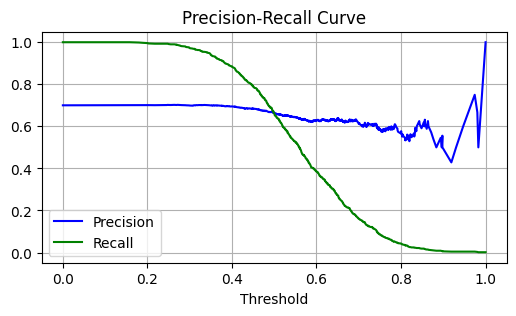

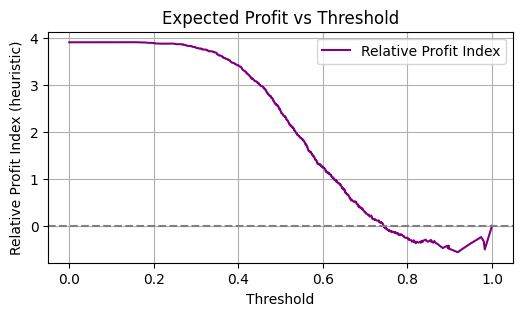

In [49]:
precision, recall, thresh = precision_recall_curve(df["target"], df["score"])
profit = recall*(df["target"].mean())*(COST_FP+COST_FN) - (1-precision)*(COST_FP)

plt.figure(figsize=(6,3))
plt.plot(thresh, precision[:-1], label="Precision", color="blue")
plt.plot(thresh, recall[:-1], label="Recall", color="green")
plt.title("Precision-Recall Curve")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(thresh, profit[:-1], color="purple", label="Relative Profit Index")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Threshold")
plt.ylabel("Relative Profit Index (heuristic)")
plt.title("Expected Profit vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
preds_opt = (df["score"] >= best_t).astype(int)
tn, fp, fn, tp = confusion_matrix(df["target"], preds_opt).ravel()
cm_df = pd.DataFrame(
    [[tp, fp],[fn, tn]],
    index=["Actual Good","Actual Bad"],
    columns=["Pred Good","Pred Bad"]
)
display(cm_df)

print("\nExpected Cost @ optimal threshold: ", round(cost_results['cost'].min(),4))

,Pred Good,Pred Bad
Actual Good,700,298
Actual Bad,0,2



Expected Cost @ optimal threshold:  0.298


In [51]:
cost_results.to_csv("/content/eda_outputs/cost_threshold_curve.csv", index=False)
cm_df.to_csv("/content/eda_outputs/confusion_cost_optimal.csv")

print("\nStep 5 complete — Cost-sensitive evaluation and profit curves ready for model integration.")


Step 5 complete — Cost-sensitive evaluation and profit curves ready for model integration.


## ***STEP 6***

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler

In [53]:
df = pd.read_csv("/content/eda_outputs/german_clean_main.csv")
df["target"] = df["target"].map({"Good": 1, "Bad": 0})

In [54]:
numeric_features = ["duration","credit_amount","installment_rate",
                    "residence_since","age","existing_credits","dependents"]

ordinal_features = {
    "savings": ['A65','A61','A62','A63','A64'],
    "employment": ['A71','A72','A73','A74','A75'],
    "job": ['A171','A172','A173','A174']
}

nominal_features = [c for c in df.columns
                    if c not in numeric_features + list(ordinal_features.keys()) + ["target"]]

print("Numeric features:", numeric_features)
print("Ordinal features:", list(ordinal_features.keys()))
print("Nominal features:", nominal_features)

Numeric features: ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits', 'dependents']
Ordinal features: ['savings', 'employment', 'job']
Nominal features: ['checking_status', 'credit_history', 'purpose', 'personal_status_sex', 'guarantors', 'property', 'other_installment_plans', 'housing', 'telephone', 'foreign_worker']


In [55]:
ord_df = df.copy()
for col, order in ordinal_features.items():
    ord_df[col] = pd.Categorical(ord_df[col], categories=order, ordered=True).codes

In [58]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
ohe_data = pd.DataFrame(ohe.fit_transform(ord_df[nominal_features]),
                        columns=ohe.get_feature_names_out(nominal_features))
df_encoded = pd.concat([ord_df.drop(columns=nominal_features), ohe_data], axis=1)

print(f"\nEncoded dataset shape: {df_encoded.shape}")


Encoded dataset shape: (1000, 41)


In [59]:
scaler = RobustScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

In [60]:
X = df_encoded.drop(columns=["target"])
y = df_encoded["target"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5,
                                                    stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape},  Valid: {X_valid.shape},  Test: {X_test.shape}")

Train: (700, 40),  Valid: (150, 40),  Test: (150, 40)


In [61]:
import os
os.makedirs("/content/eda_outputs/model_ready", exist_ok=True)

X_train.to_csv("/content/eda_outputs/model_ready/X_train.csv", index=False)
X_valid.to_csv("/content/eda_outputs/model_ready/X_valid.csv", index=False)
X_test.to_csv("/content/eda_outputs/model_ready/X_test.csv", index=False)
y_train.to_csv("/content/eda_outputs/model_ready/y_train.csv", index=False)
y_valid.to_csv("/content/eda_outputs/model_ready/y_valid.csv", index=False)
y_test.to_csv("/content/eda_outputs/model_ready/y_test.csv", index=False)

print("\n Step 6 complete — dataset encoded, scaled, and split for modeling.")


 Step 6 complete — dataset encoded, scaled, and split for modeling.


# ***Model Training, Comparison & Cost-Aware Evaluation***

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve
)

In [63]:
X_train = pd.read_csv("/content/eda_outputs/model_ready/X_train.csv")
y_train = pd.read_csv("/content/eda_outputs/model_ready/y_train.csv").squeeze()
X_valid = pd.read_csv("/content/eda_outputs/model_ready/X_valid.csv")
y_valid = pd.read_csv("/content/eda_outputs/model_ready/y_valid.csv").squeeze()

In [64]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=6, random_state=42, class_weight='balanced'),
    "XGBoost": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
}

In [65]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds_prob = model.predict_proba(X_valid)[:,1]
    preds = (preds_prob >= 0.5).astype(int)

    auc = roc_auc_score(y_valid, preds_prob)
    acc = accuracy_score(y_valid, preds)
    cm = confusion_matrix(y_valid, preds)
    tn, fp, fn, tp = cm.ravel()
    cost = (fp*1 + fn*5) / len(y_valid)  # using same 5× cost logic

    results.append({
        "Model": name,
        "AUC": auc,
        "Accuracy": acc,
        "Expected Cost": cost,
        "TP": tp, "FP": fp, "FN": fn, "TN": tn
    })

In [66]:
results_df = pd.DataFrame(results).sort_values("AUC", ascending=False)
print("\n📊 Model Performance Summary:")
display(results_df)


📊 Model Performance Summary:


,Model,AUC,Accuracy,Expected Cost,TP,FP,FN,TN
0,Logistic Regression,0.752593,0.766667,0.526667,94,24,11,21
1,Random Forest,0.740529,0.720000,0.946667,80,17,25,28
2,XGBoost,0.685503,0.693333,0.760000,88,29,17,16


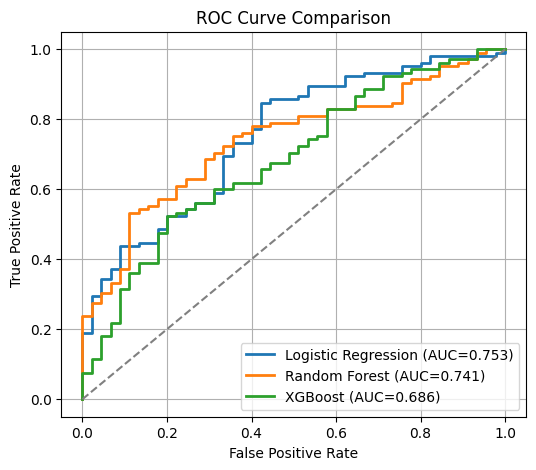

In [67]:
plt.figure(figsize=(6,5))
for name, model in models.items():
    preds_prob = model.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = roc_curve(y_valid, preds_prob)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc_score(y_valid, preds_prob):.3f})")

plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

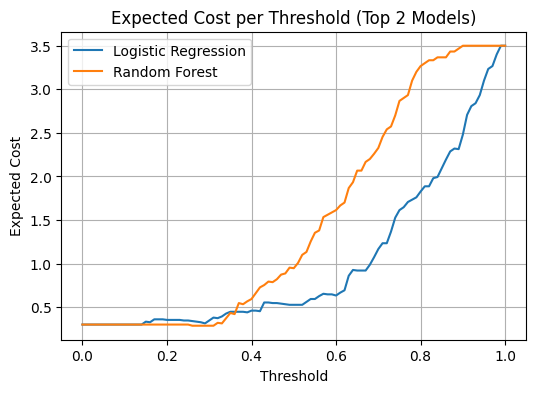

In [68]:
def cost_curve(model, name):
    thresholds = np.linspace(0,1,101)
    costs = []
    preds_prob = model.predict_proba(X_valid)[:,1]
    for t in thresholds:
        preds = (preds_prob >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_valid, preds).ravel()
        cost = (fp*1 + fn*5) / len(y_valid)
        costs.append(cost)
    plt.plot(thresholds, costs, label=f"{name}")

plt.figure(figsize=(6,4))
for name in results_df["Model"].head(2):
    cost_curve(models[name], name)
plt.title("Expected Cost per Threshold (Top 2 Models)")
plt.xlabel("Threshold")
plt.ylabel("Expected Cost")
plt.legend()
plt.grid(True)
plt.show()

In [69]:
results_df.to_csv("/content/eda_outputs/model_results_summary.csv", index=False)
print("\nModel comparison complete — all metrics and curves generated.")


Model comparison complete — all metrics and curves generated.


#**SHAP-based Explainability for Top Model**

In [70]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 0️⃣ Load previous model results and data
results_df = pd.read_csv("/content/eda_outputs/model_results_summary.csv")
X_valid = pd.read_csv("/content/eda_outputs/model_ready/X_valid.csv")
y_valid = pd.read_csv("/content/eda_outputs/model_ready/y_valid.csv").squeeze()

# Re-instantiate the same top 3 models for interpretation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=6, random_state=42, class_weight='balanced'),
    "XGBoost": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
}


In [71]:
best_model_name = results_df.sort_values("AUC", ascending=False).iloc[0]["Model"]
print(f"🧠 Best model selected for SHAP analysis: {best_model_name}")

# Reload training data to fit again for SHAP (since we need model object)
X_train = pd.read_csv("/content/eda_outputs/model_ready/X_train.csv")
y_train = pd.read_csv("/content/eda_outputs/model_ready/y_train.csv").squeeze()

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

🧠 Best model selected for SHAP analysis: Logistic Regression


LogisticRegression(max_iter=1000)

In [74]:
if "Forest" in best_model_name or "XGBoost" in best_model_name:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_valid)
else:
    # For logistic regression or other linear models
    explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_valid)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


/tmp/ipython-input-2804895470.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_valid, plot_type="bar", show=False)


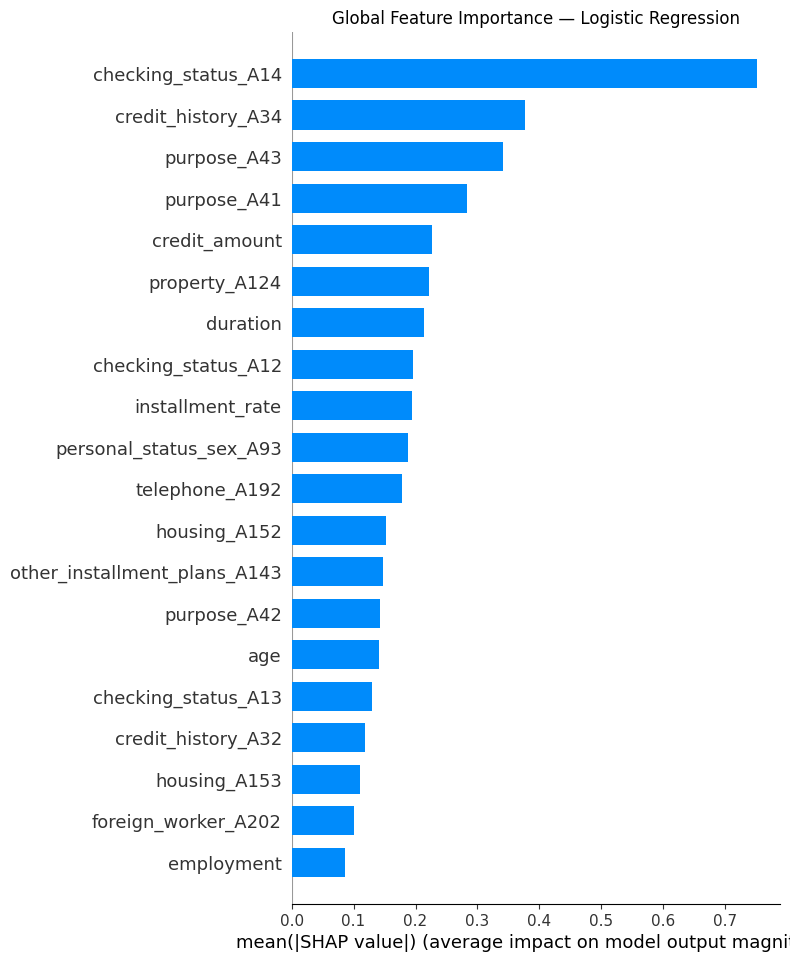

In [75]:
plt.figure(figsize=(8,6))
if isinstance(shap_values, list):  # tree models return list for classes
    shap.summary_plot(shap_values[1], X_valid, plot_type="bar", show=False)
else:
    shap.summary_plot(shap_values, X_valid, plot_type="bar", show=False)
plt.title(f"Global Feature Importance — {best_model_name}")
plt.show()

/tmp/ipython-input-2140755310.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_valid, show=False)


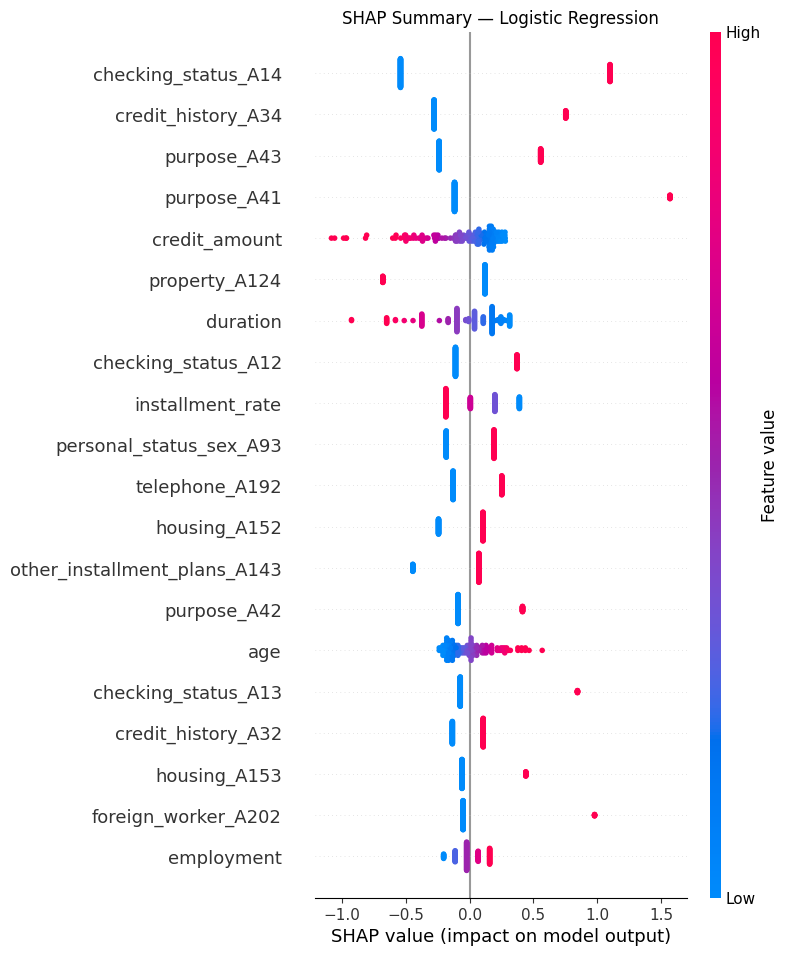

In [76]:
plt.figure(figsize=(8,6))
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_valid, show=False)
else:
    shap.summary_plot(shap_values, X_valid, show=False)
plt.title(f"SHAP Summary — {best_model_name}")
plt.show()

🔍 Example applicant index: 102


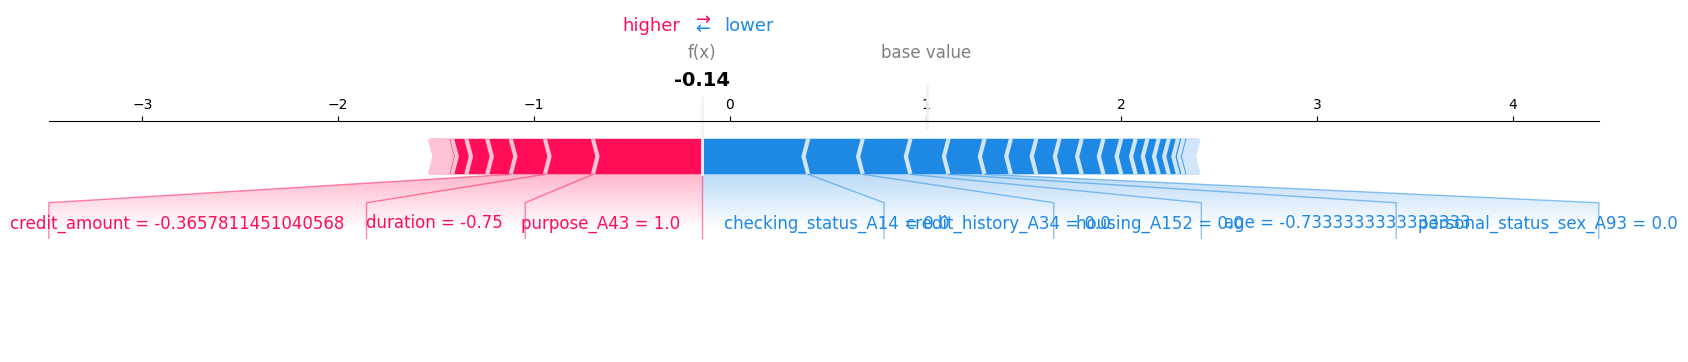

In [77]:
idx = np.random.randint(0, len(X_valid))
print(f"🔍 Example applicant index: {idx}")
if isinstance(shap_values, list):
    shap.force_plot(explainer.expected_value[1], shap_values[1][idx,:],
                    X_valid.iloc[idx,:], matplotlib=True)
else:
    shap.force_plot(explainer.expected_value, shap_values[idx,:],
                    X_valid.iloc[idx,:], matplotlib=True)

In [78]:
if isinstance(shap_values, list):
    shap_mean = np.abs(shap_values[1]).mean(axis=0)
else:
    shap_mean = np.abs(shap_values).mean(axis=0)
feat_importance = pd.DataFrame({"Feature": X_valid.columns, "Mean|SHAP|": shap_mean})
feat_importance = feat_importance.sort_values("Mean|SHAP|", ascending=False)
feat_importance.to_csv("/content/eda_outputs/shap_feature_importance.csv", index=False)

print("\n SHAP analysis complete — global & local interpretability visuals generated.")


 SHAP analysis complete — global & local interpretability visuals generated.
